# Joins

In [1]:
Los joins son una parte fundamental en el trabajo con multiples tablas

SyntaxError: invalid syntax (<ipython-input-1-d2fe62d53a9d>, line 1)

In [1]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.conf import SparkConf
import pyspark.sql.functions as func

from IPython.display import Image


In [2]:
# create an spark session
spark_conf = SparkConf().setAppName('joins')
spark_conf.set('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:2.7.3,org.postgresql:postgresql:9.4.1211')
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

sc = spark.sparkContext

In [3]:
list_1 = [("juan","2"),("camilo","4"),("cristian","4"),("luz","2")]
df1 = spark.createDataFrame(list_1, ["name","total"])

In [4]:
df1.show()

+--------+-----+
|    name|total|
+--------+-----+
|    juan|    2|
|  camilo|    4|
|cristian|    4|
|     luz|    2|
+--------+-----+



In [5]:
list_2 = [("juan","4"),("andres","4"),("cristian","3"),("luz","2"),("david","5")]
df2 = spark.createDataFrame(list_2, ["name","total"])

In [6]:
df2.show()

+--------+-----+
|    name|total|
+--------+-----+
|    juan|    4|
|  andres|    4|
|cristian|    3|
|     luz|    2|
|   david|    5|
+--------+-----+



In [36]:
df3 = df1.alias("df1").join(df2.alias("df2"), ["name"], how="full")#.select("name, COALESCE(df2.total, df1.total)").show()
df3 = df3.withColumn('c', func.coalesce(df3['df2.total'],df3['df1.total'])).selectExpr("name","c as total").show()


+--------+-----+
|    name|total|
+--------+-----+
|   david|    5|
|cristian|    3|
|     luz|    2|
|    juan|    4|
|  andres|    4|
|  camilo|    4|
+--------+-----+



In [ ]:
df1.alias("df1").join(df2.alias("df2"), ["name"], how="full").where("df1.total is not null").show()

In [12]:
df1.union(df2).show()

+--------+-----+
|    name|total|
+--------+-----+
|    juan|    2|
|  camilo|    4|
|cristian|    4|
|     luz|    2|
|    juan|    4|
|  andres|    4|
|cristian|    3|
|     luz|    2|
|   david|    5|
+--------+-----+



In [8]:
df2.join(df1, df1.name == df2.name, how="left_anti").show()

+------+-----+
|  name|total|
+------+-----+
| david|    5|
|andres|    4|
+------+-----+



podemos trabajar con las dos tablas usando los diferentes tipos de joins. Cada join debera recibir el parametro de la llave o llaves por las que se quiere comparar las tablas

In [7]:
df1.join(df2, "name").show()

+--------+-----+-----+
|    name|total|total|
+--------+-----+-----+
|cristian|    4|    3|
|     luz|    2|    2|
|    juan|    2|    4|
+--------+-----+-----+



por defecto se realizara un lef join

si entre las tablas la llave sobre la que se quiere realizar el join, se tiene un nombre diferente

In [8]:
df1.join(df2, df1.name == df2.name).show()

+--------+-----+--------+-----+
|    name|total|    name|total|
+--------+-----+--------+-----+
|cristian|    4|cristian|    3|
|     luz|    2|     luz|    2|
|    juan|    2|    juan|    4|
+--------+-----+--------+-----+



para realizar el join se puede especificar el tipo de join 

en general vamos a encontrar 6 tipos de joins:

· FULL OUTER / OUTER / FULL
    
· INNER

· LEFT OUTER / LEFT

· RIGHT OUTER / RIGHT

· LEFT SEMI

· LEFT ANTI

FULL: 
    Combinara las dos tablas, dando como resultado un nuevo df donde las llaves coinciden y existen, es decir no retornara un null


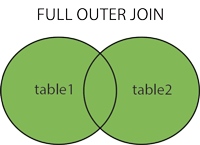

In [10]:
Image("https://www.w3schools.com/sql/img_fulljoin.gif")

In [11]:
df1.join(df2, ["name"], how="full").show()

+--------+-----+-----+
|    name|total|total|
+--------+-----+-----+
|   david| null|    5|
|cristian|    4|    3|
|     luz|    2|    2|
|    juan|    2|    4|
|  andres| null|    4|
|  camilo|    4| null|
+--------+-----+-----+



In [12]:
df1.join(df2, ["name"], how="full").where("df1.total != null").show()

AnalysisException: "cannot resolve '`df1.total`' given input columns: [name, total, total]; line 1 pos 0;\n'Filter NOT ('df1.total = null)\n+- AnalysisBarrier\n      +- Project [coalesce(name#0, name#12) AS name#79, total#1, total#13]\n         +- Join FullOuter, (name#0 = name#12)\n            :- LogicalRDD [name#0, total#1], false\n            +- LogicalRDD [name#12, total#13], false\n"

In [13]:
df1.alias("df1").join(df2.alias("df2"), ["name"], how="full").where("df1.total is not null").show()

+--------+-----+-----+
|    name|total|total|
+--------+-----+-----+
|cristian|    4|    3|
|     luz|    2|    2|
|    juan|    2|    4|
|  camilo|    4| null|
+--------+-----+-----+



In [14]:
df1.alias("df1").join(df2.alias("df2"), ["name"], how="full").where("df1.total == df2.total").show()

+----+-----+-----+
|name|total|total|
+----+-----+-----+
| luz|    2|    2|
+----+-----+-----+



In [15]:
df1.alias("df1").join(df2.alias("df2"), ["name"], how="full").where("df1.total == df2.total").show()

+----+-----+-----+
|name|total|total|
+----+-----+-----+
| luz|    2|    2|
+----+-----+-----+



In [16]:
df1.join(df2, ["name"], how="full_outer").show()

+--------+-----+-----+
|    name|total|total|
+--------+-----+-----+
|   david| null|    5|
|cristian|    4|    3|
|     luz|    2|    2|
|    juan|    2|    4|
|  andres| null|    4|
|  camilo|    4| null|
+--------+-----+-----+



INNER: 
    Combinara las dos tablas, dando como resultado un nuevo df donde las llaves coinciden y existen, es decir no retornara un null


In [ ]:
Image("https://www.w3schools.com/sql/img_innerjoin.gif")

In [ ]:
df1.join(df2, ["name"], how="inner").show()

In [ ]:
joins = ("inner", "outer", "full", "full_outer", "left", "left_outer", "right", 
         "right_outer", "left_semi", "left_anti")
#joins = ("left_semi", "left_anti")

for join_type in joins:
    print(join_type.upper())
    df_1.join(df_2, ["name"], how=join_type).show()
    

In [ ]:
df_3 = df_1.join(df_2, ["name"], how="full")

In [ ]:
df_3.show()

In [ ]:
#new elements
df_3.filter(df_1.total.isNull()).drop(df_1.total).show()

In [ ]:
# element to update
df_3.where(df_1.total != df_2.total).drop(df_1.total).show()

In [ ]:
# elements withouth changes
df_3.where(df_1.total == df_2.total).show()

In [ ]:
n_df1 = df1.select("name")
n_df1.show()

In [ ]:
n_df2 = df2.select("name")
n_df2.show()

al considerar n_df2 como un listado de nuevos elementos, para determinar quienes son los nuevos que antes no estaban en n_df1

In [44]:
n_df2.join(n_df1, ["name"], how="left_anti").show()

NameError: name 'n_df2' is not defined

In [34]:
list_11 = [("juan","2","r"),("juan","1","p"),("juan","3","q"),("camilo","1","rr"),("cristian","4","pp")]
m_df1 = spark.createDataFrame(list_11, ["name","total","val"])

In [35]:
m_df1.show()

+--------+-----+---+
|    name|total|val|
+--------+-----+---+
|    juan|    2|  r|
|    juan|    1|  p|
|    juan|    3|  q|
|  camilo|    1| rr|
|cristian|    4| pp|
+--------+-----+---+



In [36]:
list_12 = [("m","1"),("m","2"),("m","3"),("m","4")]
m_df2 = spark.createDataFrame(list_12, ["name","total"]).select("total")

In [37]:
m_df2.show()

+-----+
|total|
+-----+
|    1|
|    2|
|    3|
|    4|
+-----+



In [40]:
piv = m_df1.select("name").distinct().crossJoin(m_df2)

In [43]:
piv.join(m_df1, ["name","total"], how="left_outer").show()

+--------+-----+----+
|    name|total| val|
+--------+-----+----+
|    juan|    2|   r|
|cristian|    4|  pp|
|  camilo|    3|null|
|    juan|    1|   p|
|  camilo|    4|null|
|cristian|    3|null|
|  camilo|    1|  rr|
|    juan|    3|   q|
|    juan|    4|null|
|  camilo|    2|null|
|cristian|    1|null|
|cristian|    2|null|
+--------+-----+----+

